# Evaluating the best model in Multiple Linear Regression

## Explore the dataset

In [70]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
# Read input data
df = pd.read_csv("advertising.csv")

In [72]:
# Display first 10 rows
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [73]:
# Find empty values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [74]:
# Find the datatypes
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [75]:
# Obtain the rows and columns
df.shape

(200, 4)

In [76]:
# Obtain further information about data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


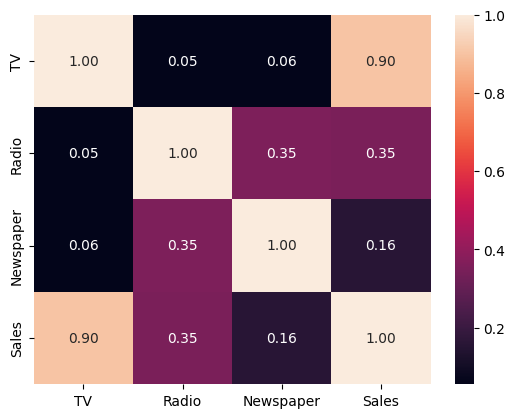

In [77]:
# Plot the correlation
sb.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

## Handle outliers

In [78]:
# Find outliers
for column in ['TV', 'Radio', 'Newspaper', 'Sales']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers for {column}: {outliers.shape[0]}")
    
# Remove outliers
df_cleaned = df.copy()
for column in ['TV', 'Radio', 'Newspaper', 'Sales']:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[
        (df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)
    ]

Outliers for TV: 0
Outliers for Radio: 0
Outliers for Newspaper: 2
Outliers for Sales: 0


## Perform a data split of 60/40 and 90/10 and compare the metrics.

In [79]:
# Split
X = df_cleaned[['TV', 'Radio', 'Newspaper']]
y = df_cleaned['Sales']

# 60/40
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)

# 90/10
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

mse_60, r2_60 = evaluate_model(X_train_60, X_test_40, y_train_60, y_test_40)
mse_90, r2_90 = evaluate_model(X_train_90, X_test_10, y_train_90, y_test_10)

print(f"60/40: MSE = {mse_60}, R² = {r2_60}")
print(f"90/10: MSE = {mse_90}, R² = {r2_90}")

60/40: MSE = 2.3092820200824122, R² = 0.9222340247705262
90/10: MSE = 2.1604742532042014, R² = 0.9313101539076515


#### Which model is performing better:
- **MSE**: The smaller the MSE, the more accurate the model's predictions; the 90/10 split has a slightly lower MSE, which means the model has less prediction error.
- **R²**: Closer to 1 means that the model explains the data better, with the 90/10 split showing a higher R² value, indicating that it explains the data better.

## Build multiple linear regression models by dropping one feature at a time

In [80]:
# TV, Radio, Sales
X_tv_radio = df_cleaned[['TV', 'Radio']]
mse_tv_radio, r2_tv_radio = evaluate_model(*train_test_split(X_tv_radio, y, test_size=0.2, random_state=42))

# TV, Newspaper, Sales
X_tv_newspaper = df_cleaned[['TV', 'Newspaper']]
mse_tv_newspaper, r2_tv_newspaper = evaluate_model(*train_test_split(X_tv_newspaper, y, test_size=0.2, random_state=42))

# Radio, Newspaper, Sales
X_radio_newspaper = df_cleaned[['Radio', 'Newspaper']]
mse_radio_newspaper, r2_radio_newspaper = evaluate_model(*train_test_split(X_radio_newspaper, y, test_size=0.2, random_state=42))

print(f"TV, Radio: MSE = {mse_tv_radio}, R² = {r2_tv_radio}")
print(f"TV, Newspaper: MSE = {mse_tv_newspaper}, R² = {r2_tv_newspaper}")
print(f"Radio, Newspaper: MSE = {mse_radio_newspaper}, R² = {r2_radio_newspaper}")

TV, Radio: MSE = 2.253563913376547, R² = 0.9188405014071852
TV, Newspaper: MSE = 5.672988460235133, R² = 0.7956938801590684
Radio, Newspaper: MSE = 24.56495330373763, R² = 0.11532161069259539


### Observations

- TV, Radio
    - MSE: 2.254
    - R²: 0.919
    - The model using the TV and Radio features shows a very good fit and low prediction error.

- TV, Newspaper
    - MSE: 5.673
    - R²: 0.796
    - The model performance is much worse for the TV and Newspaper combination. This suggests that Newspaper may not have much impact on Sales.

- Radio, Newspaper
    - MSE: 24.565
    - R²: 0.115
    - The combination of Radio and Newspaper shows very poor model performance, indicating that it explains very little of the Sales.

## Conclusions

- Best Performing Model:
    - The model using TV and Radio features performed the best, achieving an MSE of 2.254 and R² of 0.919.
    - This demonstrates that TV and Radio are the most significant predictors of Sales in the dataset.

- Feature Selection:
    - The inclusion of Newspaper reduces model performance. Dropping this feature simplifies the model and improves accuracy.

- Data Splitting:
    - While the 90/10 split produced slightly better metrics, the 60/40 split provides a more balanced approach to evaluate the model’s generalization ability.